In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.datasets import fetch_openml

In [2]:
# Download data if not already present and load as numpy array
data = fetch_openml("mnist_784", data_home="data/", as_frame=False)

In [3]:
images = data.data / 255.  # Normalize to 0-1 scale
target = data.target.astype(int)

In [4]:
imsize = int(np.sqrt(images.shape[1]))
print(f'Shape of the image dataframe: {images.shape}, so images are {imsize}x{imsize}')

Shape of the image dataframe: (70000, 784), so images are 28x28


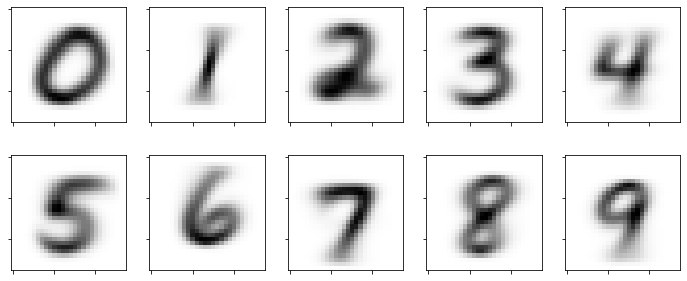

In [5]:
# Let's have a look at the average image for every digit.
plt.figure(figsize=(12, 5))
for y in range(10):
    number = np.reshape( images[np.where(target==y)].mean(axis=0) , [imsize, imsize])
    pp = plt.subplot(2, 5, y+1)
    pp.imshow(number, interpolation='nearest', cmap='Greys')
    pp.set_xticklabels([])
    pp.set_yticklabels([])

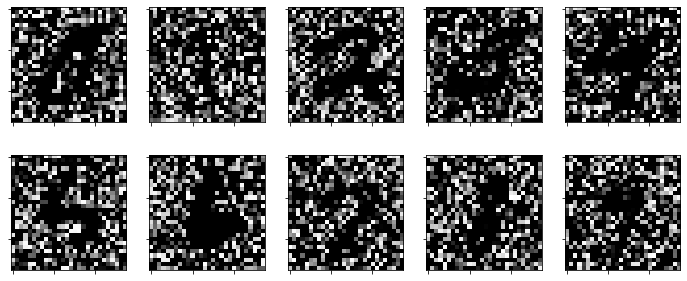

In [6]:
# Let's create some noise, in a separate array to be added to the images
n_pixels = images.size

# As a simple example: the logarithm of the noise is uniformly distributed between -4 and 0:
# lognoise = np.random.uniform(-4, 0, n_pixels).reshape(images.shape)
# xnoise = images + 10**lognoise

# Other option: linear noise.
# Making the upper limit in noise bigger than one results in noise dominated images
linnoise = np.random.uniform(0, 2, n_pixels).reshape(images.shape)
xnoise = images + linnoise

# The array array now possibly runs from (almost) zero to 2, so clip it: 
xnoise = np.clip(xnoise, 0, 1)

# Look at a random example from every digit.
plt.figure(figsize=[12, 5])
for y in range(10):
    this = np.random.choice(np.where(target == y)[0])
    number = np.reshape(xnoise[this,:], [imsize, imsize])
    pp = plt.subplot(2, 5, y+1)
    pp.imshow(number, cmap='Greys')
    pp.set_xticklabels([])
    pp.set_yticklabels([])
    